__Question 1-__
Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

__Occupations__
1. Import the necessary libraries
2. Import the dataset from this address.
3. Assign it to a variable called users
4. Discover what is the mean age per occupation
5. Discover the Male ratio per occupation and sort it from the most to the least
6. For each occupation, calculate the minimum and maximum ages
7. For each combination of occupation and sex, calculate the mean age
8. For each occupation present the percentage of women and men



In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [20]:
users = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|')
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']

In [21]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [22]:
users.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [23]:
# Creating a table with counts of genders by occupation
separate_genders = users.groupby(['occupation', 'gender']).size().unstack(fill_value=0)

# Calculating the sums of male and female for each occupation
sums = separate_genders[['F', 'M']].sum(axis=1)

# Adding a new column for the male ratio
separate_genders['New column for male Ratio'] = round(100 * separate_genders['M'] / sums, 1)

# Extracting and sorting the new column
x1 = separate_genders['New column for male Ratio']
x1_sorted = x1.sort_values(ascending=False)

# Displaying the sorted values
x1_sorted

occupation
doctor           100.0
engineer          97.0
technician        96.3
retired           92.9
programmer        90.9
executive         90.6
scientist         90.3
entertainment     88.9
lawyer            83.3
salesman          75.0
educator          72.6
student           69.4
other             65.7
marketing         61.5
writer            57.8
none              55.6
administrator     54.4
artist            53.6
librarian         43.1
healthcare        31.2
homemaker         14.3
Name: New column for male Ratio, dtype: float64

In [24]:
users.groupby('occupation').age.agg(['min','max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [13]:
users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [25]:
users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [26]:
x = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
y = users.groupby(['occupation']).agg('count')
occup_gender = x.div(y, level = "occupation") * 100
occup_gender.loc[: , 'gender']

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

In [27]:
occ_gen =users.groupby(['occupation', 'gender'])['user_id'].count().rename("count")
occu_count = occ_gen.groupby(level=0).sum()
print(occ_gen / occu_count)

occupation     gender
administrator  F         0.455696
               M         0.544304
artist         F         0.464286
               M         0.535714
doctor         M         1.000000
educator       F         0.273684
               M         0.726316
engineer       F         0.029851
               M         0.970149
entertainment  F         0.111111
               M         0.888889
executive      F         0.093750
               M         0.906250
healthcare     F         0.687500
               M         0.312500
homemaker      F         0.857143
               M         0.142857
lawyer         F         0.166667
               M         0.833333
librarian      F         0.568627
               M         0.431373
marketing      F         0.384615
               M         0.615385
none           F         0.444444
               M         0.555556
other          F         0.342857
               M         0.657143
programmer     F         0.090909
               M         0

__Question 2-__ 

**Euro Teams**
1. Import the necessary libraries
2. Import the dataset from this address
3. Assign it to a variable called euro12
4. Select only the Goal column
5. How many team participated in the Euro2012?
6. What is the number of columns in the dataset?
7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
8. Sort the teams by Red Cards, then to Yellow Cards
9. Calculate the mean Yellow Cards given per Team
10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start with G
11.  Select the first 7 column
12. . Select all columns except the last
13. Present only the Shooting Accuracy from England, Italy and Russiasia

In [29]:
import pandas as pd
import numpy as np

In [30]:
euro12 = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')

In [31]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [32]:
euro12.shape[0]   

16

In [33]:
euro12.shape[1]

35

In [34]:
Discipline= pd.DataFrame(euro12.loc[:,['Team','Yellow Cards','Red Cards']])
Discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [35]:
dis = Discipline.sort_values(by='Red Cards', ascending=True)
Redcard= dis.drop(columns='Yellow Cards')
Redcard

,Team,Red Cards
0,Croatia,0
1,Czech Republic,0
2,Denmark,0
3,England,0
4,France,0
5,Germany,0
7,Italy,0
8,Netherlands,0
10,Portugal,0
12,Russia,0


In [36]:
dis = Discipline.sort_values(by='Yellow Cards', ascending=True)
yellowcard= dis.drop(columns='Red Cards')
yellowcard

,Team,Yellow Cards
2,Denmark,4
5,Germany,4
3,England,5
8,Netherlands,5
15,Ukraine,5
4,France,6
11,Republic of Ireland,6
12,Russia,6
1,Czech Republic,7
9,Poland,7


In [37]:
Discipline["Yellow Cards"].mean()

7.4375

In [38]:
euro12[euro12['Goals'] >= 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
10,Portugal,6,22,42,34.3%,9.3%,82,6,0,0,...,10,71.5%,73,90,10,12,0,14,14,16
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [39]:
(euro12[euro12['Team'].str.startswith('G')])

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [40]:
euro12.iloc[:, 0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [41]:
euro12[euro12.columns[0:-3]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [42]:
answer = euro12.set_index('Team')
answer14 = answer.loc[['England','Italy','Russia'],['Shooting Accuracy']]
answer14

,Shooting Accuracy
Team,
England,50.0%
Italy,43.0%
Russia,22.5%


**Question 3-**
__Housing__
1. Import the necessary libraries
2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
3. Create a DataFrame by joinning the Series by column
4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
6. Ops it seems it is going only until index 99. Is it true?
7. Reindex the DataFrame so it goes from 0 to 299

In [77]:
# Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

In [78]:
# Step 2: Create 3 different Series, each of length 100
np.random.seed(17)

s1 = pd.Series(np.random.randint(1, 5, size=100))
s2 = pd.Series(np.random.randint(1, 4, size=100))
s3 = pd.Series(np.random.randint(10000, 30001, size=100))

print("Series 1:\n", s1.head())
print("Series 2:\n", s2.head())
print("Series 3:\n", s3.head())

Series 1:
 0    4
1    2
2    4
3    3
4    3
dtype: int32
Series 2:
 0    2
1    2
2    2
3    3
4    2
dtype: int32
Series 3:
 0    21778
1    17272
2    14847
3    26136
4    18214
dtype: int32


In [79]:
# Step 3: Create a DataFrame by joining the Series by column
df = pd.concat([s1, s2, s3], axis=1)
print("DataFrame created by joining the Series by column:\n", df.head())

DataFrame created by joining the Series by column:
    0  1      2
0  4  2  21778
1  2  2  17272
2  4  2  14847
3  3  3  26136
4  3  2  18214


In [80]:
# Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
df.head()

,bedrs,bathrs,price_sqr_meter
0,4,2,21778
1,2,2,17272
2,4,2,14847
3,3,3,26136
4,3,2,18214


In [81]:
# Step 5: Create a one-column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn_df = pd.DataFrame(pd.concat([s1, s2, s3], axis=0), columns=['bigcolumn'])
print("One-column DataFrame 'bigcolumn_df':\n", bigcolumn_df.head())

One-column DataFrame 'bigcolumn_df':
    bigcolumn
0          4
1          2
2          4
3          3
4          3


In [82]:
# Step 6. Ops it seems it is going only until index 99. Is it true?
bigcolumn_df.tail()

,bigcolumn
95,29943
96,29427
97,17636
98,28966
99,25790


In [83]:
len(bigcolumn_df)

300

In [84]:
# Step 7. Reindex the DataFrame so it goes from 0 to 299
bigcolumn_df.reset_index(inplace=True, drop=True)
bigcolumn_df.tail()

,bigcolumn
295,29943
296,29427
297,17636
298,28966
299,25790


__Question 4__

__Wind Statistics__

The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71

The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.
1. Import the necessary libraries
2. Import the dataset from the attached file wind.txt
3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
7. Compute how many non-missing values there are in total.
8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
A single number for the entire dataset.
9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
A different set of numbers for each location.
10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
A different set of numbers for each day.
11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.
12. Downsample the record to a yearly frequency for each location.
13. Downsample the record to a monthly frequency for each location.
14. Downsample the record to a weekly frequency for each location.
15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [119]:
#Step 1. Import the necessary libraries
import pandas as pd
import numpy as np
import datetime as dt

In [120]:
#Step 2. Import the dataset from the attached file wind.txt
#Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
db = pd.read_csv('wind.txt', delimiter='\s+')
db.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [121]:
#Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
db.rename(columns={'Yr':'Year','Mo':"Month","Dy":"Day"}, inplace=True)

db['Year'] += 1900

In [122]:
#Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
db.index = pd.to_datetime(pd.concat([db['Year'], db['Month'], db['Day']], axis=1))
db.drop(['Year','Month','Day'], axis=1, inplace=True)

In [123]:
#Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
db.isnull().values.ravel().sum()

31

In [124]:
#Step 7. Compute how many non-missing values there are in total
m = db.count()
print("Non-missing Values are:",m.sum())

Non-missing Values are: 78857


In [125]:
#Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
n = db.mean()
n.mean()

10.227982360836938

In [126]:
#Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean
#windspeeds and standard deviations of the windspeeds at each location over all the days A different set of numbers for each location.
loc_stats = pd.DataFrame()
loc_stats['min:'] = db.min()
loc_stats['max:'] = db.max()
loc_stats['mean:'] = db.mean()
loc_stats['std:'] = db.std()

In [127]:
# step 10
day_stats = pd.DataFrame()
day_stats['min:'] = db.min(axis=1)
day_stats['max:'] = db.max(axis=1)
day_stats['mean:'] = db.mean(axis=1)
day_stats['std:'] = db.std(axis=1)

In [131]:
#Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.

data['date']=data.index
data['month']=data['date'].apply(lambda date:date.month)
data['year']=data['date'].apply(lambda date:date.year)
data['day']=data['date'].apply(lambda date:date.day)
january_winds=data.query('month==1')
january_winds
january_winds.loc[:,'RPT':'MAL'].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [132]:
#Step 12. Downsample the record to a yearly frequency for each location.
data.query('month == 1 and day == 1')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,,
2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01,1,2061,1
2062-01-01,9.29,3.42,11.54,3.50,2.21,1.96,10.41,2.79,3.54,5.17,4.38,7.92,2062-01-01,1,2062,1
2063-01-01,15.59,13.62,19.79,8.38,12.25,10.00,23.45,15.71,13.59,14.37,17.58,34.13,2063-01-01,1,2063,1
2064-01-01,25.80,22.13,18.21,13.25,21.29,14.79,14.12,19.58,13.25,16.75,28.96,21.00,2064-01-01,1,2064,1
2065-01-01,9.54,11.92,9.00,4.38,6.08,5.21,10.25,6.08,5.71,8.63,12.04,17.41,2065-01-01,1,2065,1
2066-01-01,22.04,21.50,17.08,12.75,22.17,15.59,21.79,18.12,16.66,17.83,28.33,23.79,2066-01-01,1,2066,1
2067-01-01,6.46,4.46,6.50,3.21,6.67,3.79,11.38,3.83,7.71,9.08,10.67,20.91,2067-01-01,1,2067,1
2068-01-01,30.04,17.88,16.25,16.25,21.79,12.54,18.16,16.62,18.75,17.62,22.25,27.29,2068-01-01,1,2068,1
2069-01-01,6.13,1.63,5.41,1.08,2.54,1.00,8.50,2.42,4.58,6.34,9.17,16.71,2069-01-01,1,2069,1


In [133]:
#Step 13. Downsample the record to a monthly frequency for each location.
data.query('day == 1')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,,
2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01,1,2061,1
2061-02-01,14.25,15.12,9.04,5.88,12.08,7.17,10.17,3.63,6.50,5.50,9.17,8.00,2061-02-01,2,2061,1
2061-03-01,12.67,13.13,11.79,6.42,9.79,8.54,10.25,13.29,NaN,12.21,20.62,NaN,2061-03-01,3,2061,1
2061-04-01,8.38,6.34,8.33,6.75,9.33,9.54,11.67,8.21,11.21,6.46,11.96,7.17,2061-04-01,4,2061,1
2061-05-01,15.87,13.88,15.37,9.79,13.46,10.17,9.96,14.04,9.75,9.92,18.63,11.12,2061-05-01,5,2061,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-01,19.33,15.09,20.17,8.83,12.62,10.41,9.33,12.33,9.50,9.92,15.75,18.00,1978-08-01,8,1978,1
1978-09-01,8.42,6.13,9.87,5.25,3.21,5.71,7.25,3.50,7.33,6.50,7.62,15.96,1978-09-01,9,1978,1
1978-10-01,9.50,6.83,10.50,3.88,6.13,4.58,4.21,6.50,6.38,6.54,10.63,14.09,1978-10-01,10,1978,1


In [134]:
#Step 14. Downsample the record to a weekly frequency for each location.
data.query('day == 7or day==14 or day==21 or day==28')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,,
2061-01-07,13.50,14.29,9.50,4.96,12.29,8.33,9.17,9.29,7.58,7.96,13.96,13.79,2061-01-07,1,2061,7
2061-01-14,9.04,5.66,7.08,0.67,2.71,1.38,3.08,2.58,0.50,2.67,7.17,5.17,2061-01-14,1,2061,14
2061-01-21,14.33,10.25,11.92,6.13,10.04,7.67,8.04,9.17,7.04,7.87,6.75,12.42,2061-01-21,1,2061,21
2061-01-28,17.67,13.54,13.33,8.87,15.04,11.63,12.25,10.58,11.92,11.04,20.30,18.12,2061-01-28,1,2061,28
2061-02-07,18.05,14.37,14.88,9.75,10.96,11.17,14.21,9.71,13.04,12.25,15.21,17.58,2061-02-07,2,2061,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-28,9.46,7.25,8.38,0.96,6.50,3.75,1.96,4.75,4.71,4.12,9.00,11.83,1978-11-28,11,1978,28
1978-12-07,26.63,24.79,24.79,18.16,23.13,19.58,19.92,19.04,19.75,21.50,23.04,34.59,1978-12-07,12,1978,7
1978-12-14,17.21,19.75,12.71,5.83,13.79,7.33,8.83,5.71,7.96,3.37,5.21,6.92,1978-12-14,12,1978,14


In [137]:
#Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.
weekly = data.resample('W').agg(['min','max','mean','std'])
weekly.loc[weekly.index[1:53], "RPT":"MAL"] .head(10)

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Yr_Mo_Dy                                                                 
1974-01-13   6.50  28.75  21.450000  7.927883  10.63  26.63  19.514286   
1974-01-20  15.83  31.75  21.335714  5.546912  15.87  24.33  19.190000   
1974-01-27  11.17  24.75  17.612857  5.584069  10.54  21.96  15.737143   
1974-02-03  13.88  27.58  20.007143  4.797293  13.33  20.58  16.865714   
1974-02-10   9.25  28.84  18.057143  7.430616   5.46  27.04  16.680000   
1974-02-17  10.00  23.38  15.584286  5.461785   7.96  21.62  12.982857   
1974-02-24   1.54  15.16   8.327143  4.597839   0.63  14.71   8.495714   
1974-03-03   1.42  16.96   9.781429  5.162236   1.42  15.00   8.584286   
1974-03-10  10.17  18.96  13.160000  3.435695   3.17  21.17  12.958571   
1974-03-17   5.25  19.41  12.357143  4.817059   2.29  17.33  11.612857   

                        ROS         ...        CLO              BEL         \
                 std    min    max  ...       mean       std    min    max   
Yr_Mo_Dy                            ...                                      
1974-01-13  5.906750   6.83  24.58  ...  15.547143  5.458958  13.88  31.08   
1974-01-20  3.412277  13.33  23.21  ...  14.397143  1.855170  15.71  26.16   
1974-01-27  4.322749   9.79  19.04  ...  12.832857  3.992972   4.67  23.38   
1974-02-03  2.801463  11.08  21.29  ...  14.528571  4.931188   9.46  25.96   
1974-02-10  7.657600   7.71  23.71  ...  10.862857  5.661059   8.46  27.63   
1974-02-17  5.354349   8.12  18.71  ...  10.338571  3.703032   5.13  19.95   
1974-02-24  4.831449   2.37  11.79  ...   6.312857  3.175084   5.54  15.92   
1974-03-03  4.241733   2.50  14.62  ...   6.207143  3.882030   2.13  14.67   
1974-03-10  7.216822   6.63  22.50  ...   8.645714  3.343406   2.37  20.33   
1974-03-17  5.918496   6.08  17.21  ...   9.248571  3.903125   2.54  22.67   

                                   MAL                              
                 mean       std    min    max       mean       std  
Yr_Mo_Dy                                                            
1974-01-13  22.870000  6.687992  15.34  32.30  25.210000  6.904979  
1974-01-20  21.941429  3.817222  20.62  31.20  26.510000  3.270260  
1974-01-27  16.857143  5.842676  10.00  26.87  20.892857  5.512291  
1974-02-03  17.280000  5.147252  16.25  38.79  23.570000  7.443895  
1974-02-10  16.511429  6.343475  14.09  29.08  20.345714  4.914465  
1974-02-17  11.242857  5.980885   8.38  22.95  16.564286  5.316095  
1974-02-24  10.415714  3.911457   8.71  22.92  15.274286  5.591654  
1974-03-03   7.411429  3.865546   3.17  23.67  12.944286  6.284600  
1974-03-10  11.111429  5.872675  10.34  23.04  18.161429  4.166107  
1974-03-17  13.600000  7.224486   7.12  24.87  17.928571  6.251500  

[10 rows x 48 columns]

__Question 5__

1. Import the necessary libraries
2. Import the dataset from this address.
3. Assign it to a variable called chipo.
4. See the first 10 entries
5. What is the number of observations in the dataset?
6. What is the number of columns in the dataset?
7. Print the name of all the columns.
8. How is the dataset indexed?
9. Which was the most-ordered item?
10. For the most-ordered item, how many items were ordered?
11. What was the most ordered item in the choice_description column?
12. How many items were orderd in total?
13. • Turn the item price into a float  • Check the item price type  • Create a lambda function and change the type of item price  • Check the item price type
14. How much was the revenue for the period in the dataset?
15. How many orders were made in the period?
16. What is the average revenue amount per order?
17. How many different items are sold?

In [138]:
#Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

#Step 2. Import the dataset 
#Step 3. Assign it to a variable called chipo.
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep = '\t')


#Step 4. See the first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [139]:
#Step 5. What is the number of observations in the dataset?
chipo.shape[0]

4622

In [140]:
#Step 6. What is the number of columns in the dataset?
chipo.shape[1]

5

In [141]:
#Step 7. Print the name of all the columns.
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [142]:
#Step 8. How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [143]:
#Step 9. Which was the most-ordered item?
c = chipo.groupby('item_name').sum().sort_values(['quantity'], ascending=False)
c.head(1)
#'Chicken Bowl' is the most-ordered item

,order_id,quantity,choice_description,item_price
item_name,,,,
Chicken Bowl,713926,761,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98 $10.98 $11.25 $8.75 $8.49 $11.25 $8.75 ...


In [144]:
#Step 10. For the most-ordered item, how many items were ordered?
c = chipo.groupby('item_name').sum().sort_values(['quantity'], ascending=False)
c.head(1)
#761 items were ordered

,order_id,quantity,choice_description,item_price
item_name,,,,
Chicken Bowl,713926,761,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98 $10.98 $11.25 $8.75 $8.49 $11.25 $8.75 ...


In [148]:
#Step 11. What was the most ordered item in the choice_description column?
c = chipo.groupby('choice_description').sum().sort_values(['quantity'], ascending=False)
c.head(1)

,order_id,quantity,item_name,item_price
choice_description,,,,
[Diet Coke],123455,159,Canned SodaCanned SodaCanned Soda6 Pack Soft D...,326.71


In [146]:
#Step 12. How many items were orderd in total?
chipo.quantity.sum()

4972

In [147]:
#Step 13.
#• Turn the item price into a float
#• Check the item price type
#• Create a lambda function and change the type of item price
#• Check the item price type

dollarizer = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(dollarizer)
chipo.item_price

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [149]:
#Step 14. How much was the revenue for the period in the dataset?
revenue = (chipo['quantity'] * chipo['item_price']).sum()
revenue

39237.02

In [150]:
#Step 15. How many orders were made in the period?
chipo.order_id.value_counts().count()

1834

In [151]:
#Step 16. What is the average revenue amount per order?
order_grouped = chipo.groupby(by=['order_id']).sum()
order_grouped['item_price'].mean()

18.811428571428568

In [152]:
#Step 17. How many different items are sold?
chipo.item_name.value_counts().count()

50

__Question 6__

Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

In [160]:
import pandas as pd
import matplotlib.pyplot as plt

In [161]:
marriages_divorces = pd.read_csv('us-marriages-divorces-1867-2014.csv')

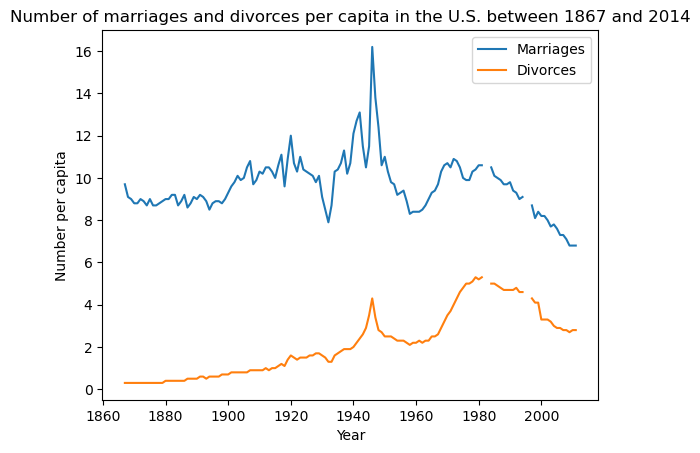

In [162]:
plt.plot(marriages_divorces.Year, marriages_divorces.Marriages_per_1000, label='Marriages')
plt.plot(marriages_divorces.Year, marriages_divorces.Divorces_per_1000, label='Divorces')
plt.xlabel('Year')
plt.ylabel('Number per capita')
plt.title('Number of marriages and divorces per capita in the U.S. between 1867 and 2014')
plt.legend()
plt.show()

__Question 7__

Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

In [166]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the given source
data = pd.read_csv('us-marriages-divorces-1867-2014.csv') 

In [167]:
years = [1900, 1950, 2000]
subset = data[data['Year'].isin(years)]

In [168]:
subset = data[data['Year'].isin(years)].copy()
subset.loc[:, 'Marriages_per_capita'] = subset['Marriages'] / subset['Population']
subset.loc[:, 'Divorces_per_capita'] = subset['Divorces'] / subset['Population']

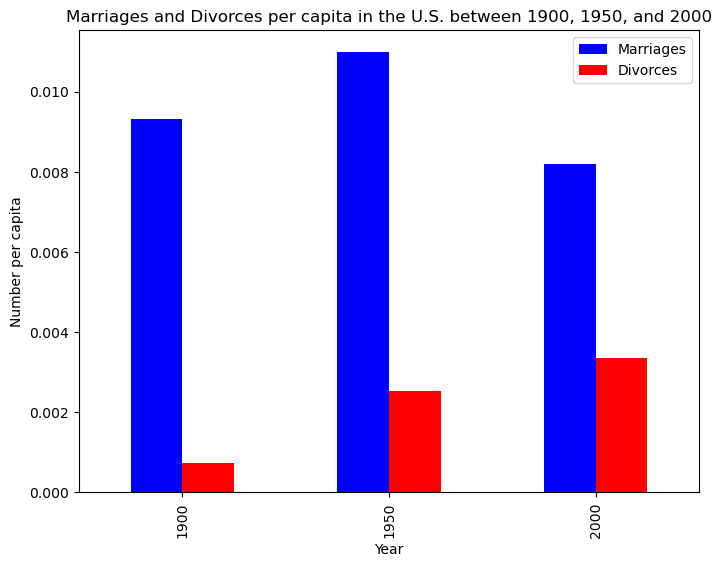

In [169]:
ax = subset.plot(x='Year', y=['Marriages_per_capita', 'Divorces_per_capita'], kind='bar', figsize=(8,6), color=['blue','red'])
ax.set_xlabel('Year')
ax.set_ylabel('Number per capita')
ax.set_title('Marriages and Divorces per capita in the U.S. between 1900, 1950, and 2000')
ax.legend(['Marriages', 'Divorces'])
plt.show()

**Question 8-**

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

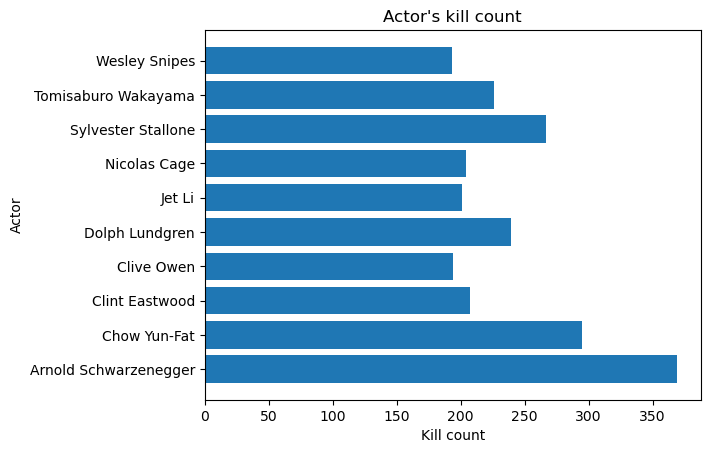

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
#read csv file
df = pd.read_csv("actor_kill_counts.csv")
#ploting bar graph
plt.barh(df['Actor'], df['Count'])
#labeling
plt.ylabel("Actor")
plt.xlabel("Kill count")
plt.title("Actor's kill count")
plt.show()


**Question 9-**

Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

In [171]:
import matplotlib.pyplot as plt
import pandas as pd

# inserting data
df = pd.read_csv("roman-emperor-reigns.csv")
df.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


In [172]:
df1 = df[df['Cause_of_Death'] == "Assassinated" ]
df1.head()

,Emperor,Length_of_Reign,Cause_of_Death
2,Caligula,4.83,Assassinated
5,Galba,0.58,Assassinated
7,Vitellius,0.67,Assassinated
10,Domitian,15.00,Assassinated
17,Commodus,15.00,Assassinated


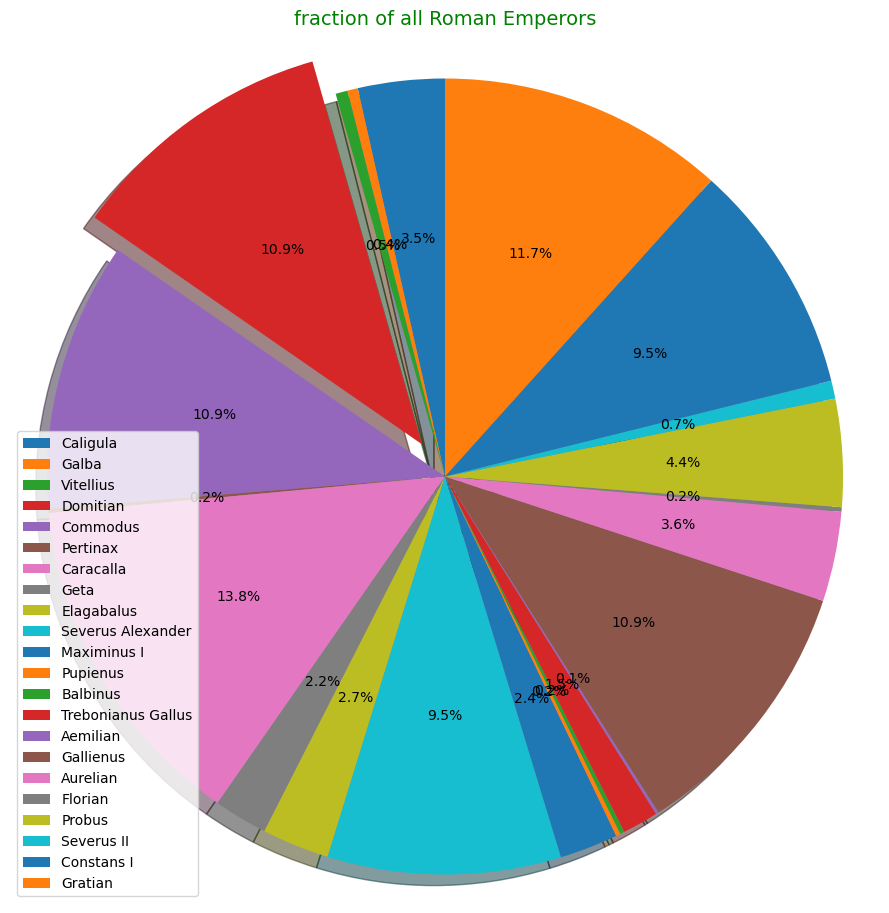

In [173]:
fig= plt.figure(figsize=(9,9))
# Plot
explode = (0, 0, 0, 0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0) 
plt.pie(df1.Length_of_Reign, explode=explode ,autopct='%1.1f%%' ,shadow=True , startangle=90)
plt.legend(df1.Emperor, loc="lower left")
plt.axis('equal')
plt.tight_layout()
plt.title( "fraction of all Roman Emperors",color="Green",fontsize=14) 
plt.show()

__Question 10-__

Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

In [177]:
import pandas as pd
import matplotlib.pyplot as mpl
import numpy as np


In [178]:
arcade = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
arcade.columns = ['Year','Total_Arcade_Revenue_millions', 'Computer_Science_Doctorates_Awarded']
arcade['Total_Arcade_Revenue_millions'] = arcade['Total_Arcade_Revenue_millions'].apply(lambda x: x *1000).astype('int')
arcade

,Year,Total_Arcade_Revenue_millions,Computer_Science_Doctorates_Awarded
0,2000,1196,861
1,2001,1176,830
2,2002,1269,809
3,2003,1240,867
4,2004,1307,948
5,2005,1435,1129
6,2006,1601,1453
7,2007,1654,1656
8,2008,1803,1787
9,2009,1734,1611


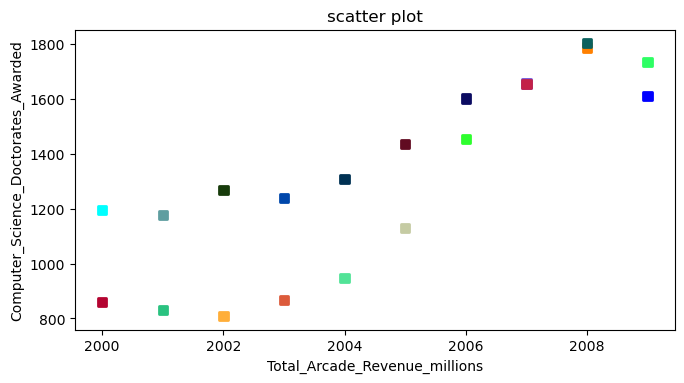

In [179]:
x = arcade['Year']
y = arcade['Computer_Science_Doctorates_Awarded']
z = arcade['Total_Arcade_Revenue_millions']
colors = np.array(["#B40431","#2AC280","#FFAE39","#DC5B3B","#52E397","#C5CBA3","#2EFE2E","#6E50D9","#FF8000","#0000FF"])
color = np.array(["#00FFFF", "#5f9ea0", "#173B0B","#0047ab", "#003153", "#610B21","#0B0B61", "#c32148", "#0B615E","#2EFE64"])
fig=plt.figure(figsize=(6,3))
ax=fig.add_axes([0,0,1,1])
ax.scatter(x, y, color=colors, label=x, linewidths= 2, marker="s")
ax.scatter(x, z, color=color, linewidths= 2, marker="s")
ax.set_xlabel('Total_Arcade_Revenue_millions')
ax.set_ylabel('Computer_Science_Doctorates_Awarded')
ax.set_title('scatter plot')
plt.show()